In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [3]:
torch.cuda.is_available()

True

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [5]:
device

device(type='cuda')

In [6]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [7]:
trainset = torchvision.datasets.CIFAR10(root='C:/Users/bitcamp/Desktop/데이타',train=True,download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='C:/Users/bitcamp/Desktop/데이타',train=True,download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
train_loader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

test_loader = DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [9]:
classes = ('plane', 'car','bird','cat','deer','dog','frog','horse','ship','truck')

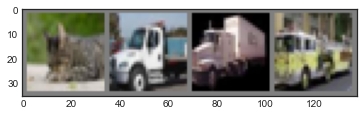

cat	 truck	 truck	 truck	


In [10]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('{}\t'.format(classes[labels[j]]) for j in range(4)))

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x= x.view(-1, 16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    
net = Net().to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(2):
    
    running_loss = 0.0
    for i , data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss=criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
            running_loss =0.0
                  

Epoch: 1, Batch: 2000, Loss: 2.2047450760006906
Epoch: 1, Batch: 4000, Loss: 1.8420786060988903
Epoch: 1, Batch: 6000, Loss: 1.6918246695399284
Epoch: 1, Batch: 8000, Loss: 1.5939400012046099
Epoch: 1, Batch: 10000, Loss: 1.5244886722713709
Epoch: 1, Batch: 12000, Loss: 1.4627901833131909
Epoch: 2, Batch: 2000, Loss: 1.3898238060325385
Epoch: 2, Batch: 4000, Loss: 1.3849230776950716
Epoch: 2, Batch: 6000, Loss: 1.3240923380181193
Epoch: 2, Batch: 8000, Loss: 1.30412165511027
Epoch: 2, Batch: 10000, Loss: 1.292703199852258
Epoch: 2, Batch: 12000, Loss: 1.3014836949035524


In [14]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

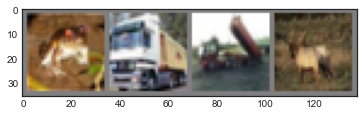

	frog 	truck 	truck 	deer


In [17]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('\t{}'.format(classes[labels[j]]) for j in range(4)))

In [18]:
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [19]:
outputs = net(images.to(device))

In [20]:
_, predicted = torch.max(outputs, 1)
print(' '.join('\t{}'.format(classes[predicted[j]]) for j in range(4)))

	dog 	truck 	truck 	deer


In [21]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outptus = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
print(100 * correct/total)

9.988


In [22]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outptus = net(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted==labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print("Accuracy of {}: {}%".format(classes[i], 100 * class_correct[i] / class_total[i]))
        

Accuracy of plane: 0.0%
Accuracy of car: 0.0%
Accuracy of bird: 0.0%
Accuracy of cat: 0.0%
Accuracy of deer: 25.4%
Accuracy of dog: 24.76%
Accuracy of frog: 0.0%
Accuracy of horse: 0.0%
Accuracy of ship: 0.0%
Accuracy of truck: 49.72%
